<a href="https://colab.research.google.com/github/FGalvao77/Classificacao-de-imagens-com-Python-TensorFlow-e-Deep-Learning/blob/main/Classifica%C3%A7%C3%A3o_de_imagens_com_Python%2C_TensorFlow_e_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de imagens com Python, TensorFlow e Deep Learning**

---



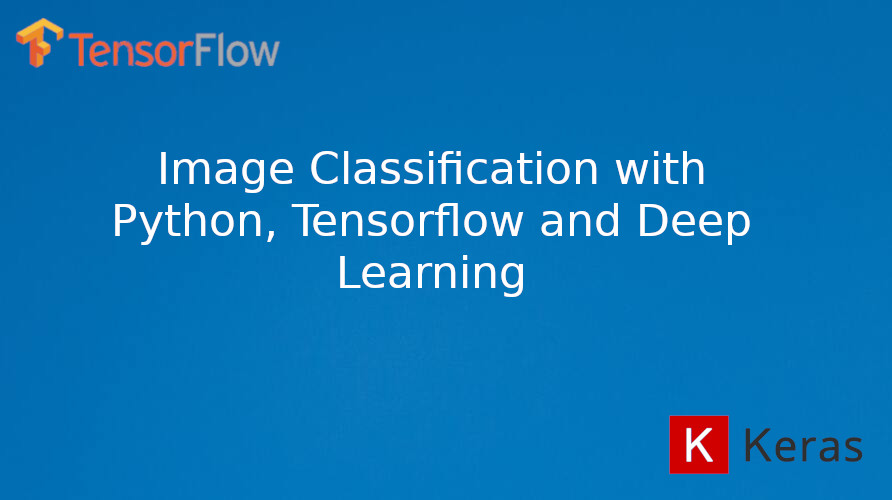

## **1. Introdução**

Neste tutorial, abordaremos o  conjunto de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) para treinar uma rede neural que classificará imagens de roupas.

O conjunto de dados contém 70.000 imagens em tons de cinza de 28 × 28 pixels cada em 10 categorias.

O conjunto de dados Fashion MNIST é uma substituição imediata do conjunto de dados MNIST, o que nos apresenta um problema mais desafiador do que o conjunto de dados de reconhecimento de dígitos MNIST.

A imagem abaixo mostra uma amostra do conjunto de dados Fashion MNIST:

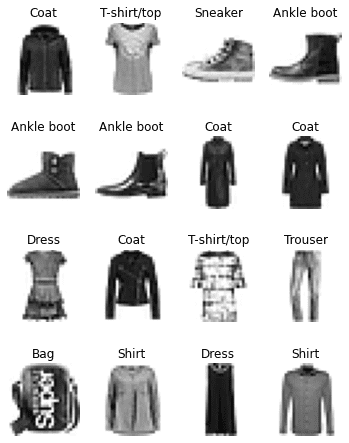

## **2. Importando o conjunto de dados usando Keras**

Vamos importar oc conjunto de dados `Fashion MNIST`` usando Keras.

In [1]:
# importando a biblioteca
from tensorflow import keras

In [2]:
# instanciando o conjunto de dados
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# particionando o conjunto de dados em para o treino e teste
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


O conjunto de dados contém _60.000 imagens_ para treinar a rede e _10.000 imagens_ para teste.

**X_full** e **y_full** representam o conjunto de treinamento e **X_test** e **y_test** representam o conjunto de teste.

As imagens são representadas como matrizes de _28 x 28_ com intensidades de pixel variando de _0 a 250_.

## **3. Exploração e pré-processamento dos dados**

Vamos dar uma olhada nos dados que carregamos. O conjunto de treinamento contém 60.000 imagens de treinamento representadas como matrizes de 28 x 28 do _Numpy_ e 60.000 rótulos.

O conjunto de teste contém 10.000 imagens de treinamento representadas como matrizes 28 x 28 do _Numpy_ e há 10.000 rótulos correspondentes.

In [4]:
# visualizando a dimensão das variávies
X_full.shape, y_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

O conjunto de dados já está dividido em um conjunto de treinamento e um conjunto de teste, mas também queremos um conjunto de validação, então vamos criar um. 

Também precisamos dimensionar os recursos de entrada para um intervalo de 0 a 1 antes de treinar a rede neural. Para isso, vamos simplesmente dividir os valores dos pixels por 255,0.

In [5]:
# instanciando dados de validação e dividindo as matrizes por 255.0 (pixels)
# aqui estamos realizando um escalamento (normalização) dos dados
X_valid, X_train = X_full[:5_000] / 255.0, X_full[5_000:] / 255.0
y_valid, y_train = y_full[:5_000], y_full[5_000:]
X_test = X_test / 255.0

Pegamos as primeiras 5.000 imagens do conjunto de treinamento para criar o conjunto de validação e as 55.000 imagens restantes formarão o conjunto de treinamento.

Os rótulos são inteiros que variam de 0 a 9 e cada inteiro corresponde a um nome de classe. Aqui está a lista de nomes de classes.

In [6]:
# instanciando as classes das imagens
class_images = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Assim, por exemplo, a primeira imagem no conjunto de treinamento representa um casaco.

In [7]:
# visualizando a classe da imagem
class_images[y_train[0]]

'Coat'

## **4. Construindo o modelo usando a API sequencial**

Agora vamos construir a rede neural.

In [8]:
# importando a biblioteca
from tensorflow.keras import layers

In [9]:
# instanciando a rede neural
model = keras.models.Sequential([
                                 layers.Flatten(input_shape=[28, 28]), 
                                 layers.Dense(128, activation='relu'), 
                                 layers.Dense(64, activation='relu'),
                                 layers.Dense(10, activation='softmax')
])

Começamos criando um modelo **Sequencial** apropriado para uma pilha simples de camadas.

A primeira camada nesta rede é uma camada **Flatten** cuja função é converter cada imagem de uma matriz bidimensional (28 x 28 pixels) em uma matriz unidimensional (784 pixels).

Em seguida, temos uma sequência de duas camadas **Dense** totalmente conectadas com 128 neurônios e 64 neurônios (ou nós), respectivamente. Eles usarão a função de ativação `reLu`.

Finalmente, temos uma camada de saída **Dense** com 10 neurônios (um para cada um dos rótulos) usando a função de ativação `softmax` que nos dará nossas probabilidades reais de rótulo de classe de saída.

Em vez de passar uma lista de camadas ao criar o modelo Sequencial como fizemos, podemos adicionar as camadas de forma incremental por meio do método **add( )**.

Podemos usar o  método **summary( )** do modelo para exibir todas as camadas do modelo junto com seus parâmetros e formas

In [10]:
# visualizando a rede neural e suas camadas e parâmetros
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


O resumo também exibe o número total de parâmetros, incluindo parâmetros treináveis ​​e não treináveis. 

Com um total de 109.386 parâmetros, a rede tem bastante flexibilidade para ajustar os dados de treinamento. Isso não significa que quanto maiores os parâmetros da rede melhor será, pois, com muita flexibilidade, a rede fica mais suscetível a overfitting dos dados de treinamento.

Também podemos gerar uma imagem do modelo usando **keras.utils.plot_model( )**.

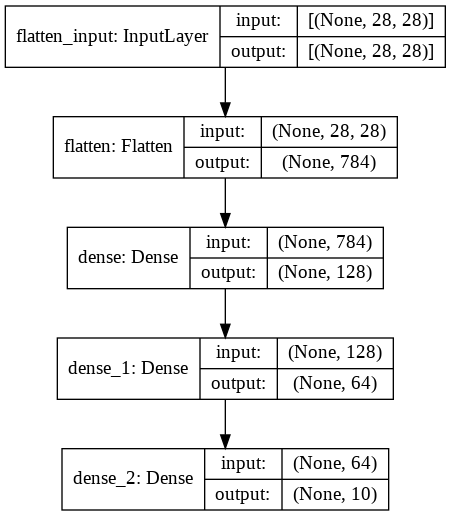

In [11]:
# visualizando graficamente a estrutura da rede neural criada
keras.utils.plot_model(model, show_shapes=True)

As camadas do modelo são acessíveis por meio do atributo **layers**.

In [12]:
# acessando as camadas do modelo
model.layers

Como **model.layers** retorna uma lista, podemos buscar uma camada por seu índice.

In [13]:
# visualizando a camada "Dense" do modelo
layer =model.layers[2]
layer.name

'dense_1'

## **5. Compilando o modelo**

Depois que o modelo é criado e antes de iniciar o treinamento, precisamos compilar o modelo usando seu método **compile( )** para adicionar:

1.  uma função de perda que irá comparar a saída desejada e a saída real da rede para nos dar uma medida da precisão do modelo durante o treinamento.
2.  um otimizador que é um algoritmo que o modelo usa para atualizar seus parâmetros e minimizar a função de perda.
3.  (opcionalmente) uma lista de métricas para monitorar as etapas de treinamento e teste.

In [14]:
# definindo a função de perda, otimizador e avaliar da métrica do modelo
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=keras.optimizers.SGD(), 
              metrics=[keras.metrics.SparseCategoricalAccuracy()]) 

## **6. Treinamento e avaliação do modelo**

Para iniciar o treinamento, simplesmente precisamos chamar o método **fit( )** do modelo. Isso "ajustará" o modelo aos dados de treinamento.

E também definiremos a quantidade de épocas (**epochs**) do treinamento.

In [15]:
# instanciando a quantidade de épocas de treinamento 
epochs = 20

# com a função ".fit()" realizamos o treinamento do modelo com os dados de treino e as épocas definidas
# e também a validação do treinamento do modelo com os dados de validação 
# e todo esse processo e seus resultados iremos instanciar na variável "history"
history = model.fit(X_train, y_train, epochs=epochs, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7581 - sparse_categorical_accuracy: 0.7477 - val_loss: 0.5364 - val_sparse_categorical_accuracy: 0.8194
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5077 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.4556 - val_sparse_categorical_accuracy: 0.8388
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4594 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.4395 - val_sparse_categorical_accuracy: 0.8502
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.4227 - val_sparse_categorical_accuracy: 0.8528
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4118 - sparse_categorical_accuracy: 0.8559 - val_loss: 0.4011 - val_sparse_categorical_accuracy: 0.8586
Epoch 6/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3951 - spars

Alimentamos o modelo com os dados de treinamento: os recursos de entrada (**X_train**) e as classes de destino (**y_train**). Também definimos o número de épocas como 20. O conjunto de validação é opcional, mas útil para ver o desempenho do modelo em cada época.

Podemos ver que o modelo atinge uma precisão de _89,47%_ no conjunto de treinamento e _88,50%_ no conjunto de validação após _20 épocas_.

A variável de **history** é um objeto que contém informações úteis sobre o treinamento, como a perda e as métricas que foram medidas ao final de cada época. Podemos usá-lo para traçar as curvas de aprendizado.

In [16]:
# importando a biblioteca
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# instanciando as métricas e a perda do modelo
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

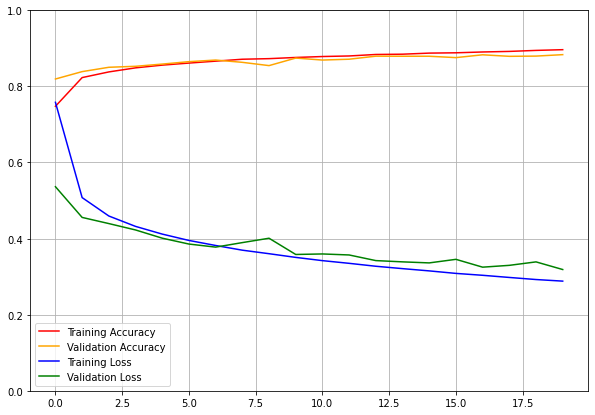

In [18]:
# plotando o gráfico 
plt.figure(figsize=(10, 7))

plt.plot(range(epochs), accuracy, 'r', label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, 'orange', 
         label='Validation Accuracy')

plt.plot(range(epochs), loss, 'b', label='Training Loss')
plt.plot(range(epochs), val_loss, 'g', 
         label='Validation Loss')

plt.legend(loc='lower left')
plt.gca().set_ylim(0, 1)
plt.grid(True)

plt.show();

Tanto a acurácia do treinamento quanto a acurácia da validação aumentam a cada época, enquanto a perda de treinamento e a perda de validação diminuem. `Perfeito`.

Não há uma grande lacuna entre a precisão do treinamento e a precisão da validação, então podemos dizer que o modelo não ajustou demais o conjunto de treinamento.

Agora é hora de avaliar o modelo no conjunto de teste para estimar o erro de generalização.

In [19]:
# avaliando a capacidade de generalização do modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 894us/step - loss: 0.3537 - sparse_categorical_accuracy: 0.8709


[0.3536907732486725, 0.8708999752998352]

## **7. Fazendo previsões com o modelo treinado**

Agora que o modelo está treinado, podemos usar seu método **predict( )** para fazer previsões em novas instâncias.

In [20]:
# usaremos o conjunto de testes para fazer previsões
X_new = X_test
y_proba = model.predict(X_new)

# usaremos o conjunto de testes para fazer previsões
y_proba.round(2)[0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.94],
      dtype=float32)

Para cada instância no conjunto de treinamento, o modelo estima 10 probabilidades (uma probabilidade por classe). Isso representa a "confiança" do modelo a qual categoria a imagem corresponde.

Neste exemplo, o modelo previu a classe 9 (Ankle boot) com 92% de probabilidade, que é a classe que tem a maior probabilidade (as probabilidades das outras classes são desprezíveis).

Podemos usar **np.argmax( )** para visualizar a classe com a maior probabilidade.

In [21]:
# importando a biblioteca
import numpy as np

In [23]:
# instanciando as probabilidades das classes
y_pred = np.argmax(y_proba, axis=1)

# visualizando as probabilidades
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [24]:
np.array(class_images)[y_pred[0]]

'Ankle boot'

Portanto, o modelo previu que esta imagem é uma **Ankle boot** (**class_images[9]**). Vamos ver se o modelo classificou a imagem corretamente.

In [27]:
# instanciando a classe real da imagem
y_true = y_test[:1]
y_true

array([9], dtype=uint8)

In [28]:
# comparando a classe da imagem predita pelo modelo 
# com a classe real da imagem acima instanciada
np.array(class_images)[y_true]

array(['Ankle boot'], dtype='<U11')

Como você pode ver, a modelo classificou essa imagem corretamente.


Abaixo você pode ver algumas imagens com suas previsões. Os rótulos de predição incorretos são vermelhos.

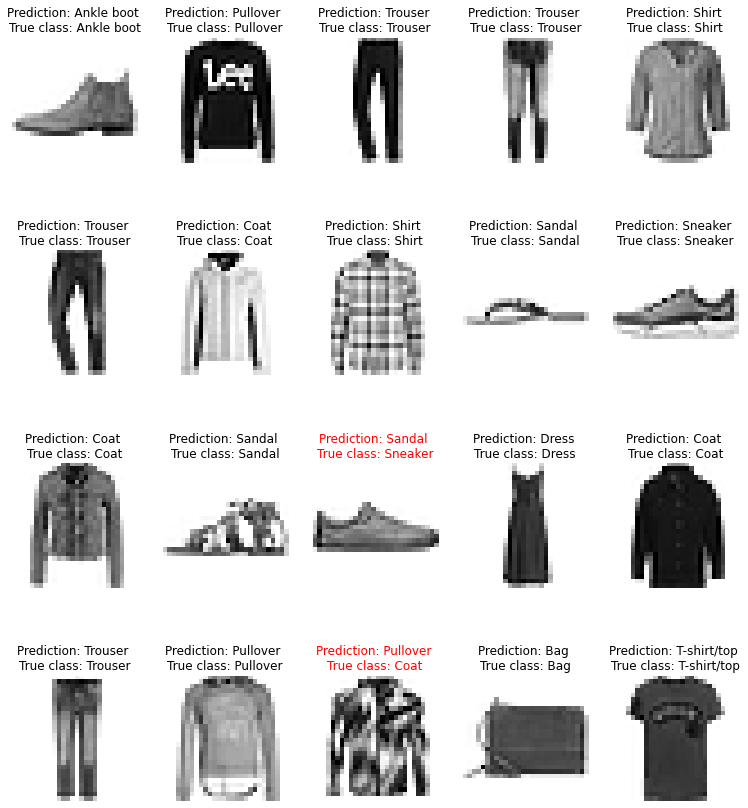

In [30]:
# plotando gráfico para visualizar a capacidade de generalização modelo
rows = 4
cols = 5

plt.figure(figsize=(13, 15))

for row in range(rows):
    for col in range(cols):
        index = cols * row + col
        plt.subplot(rows, cols, index + 1)
        plt.imshow(X_test[index], cmap='binary')
        plt.axis('off')
        color = 'black'

        # se a previsão estava incorreta, mudamos a cor do texto
        if y_pred[index] != y_test[index]:
            color = 'red'
        plt.title(f'Prediction: {class_images[y_pred[index]]} \nTrue class: {class_images[y_test[index]]}',
                  color=color)
        
plt.show();

## **8. Leitura Adicional**

Se você quiser aprender mais sobre aprendizado profundo e visão computacional, recomendo os seguintes recursos:

1.  Parte 1 Capítulo 3 do livro [Deep Learning with Python](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864?&linkCode=ll1&tag=123405e9-20&linkId=0dd2531a1dca8c5e4e1e3c8d0ef86d8c&language=en_US&ref_=as_li_ss_tl);
2.  Capítulo 10 do livro [Aprendizado de máquina prático com Scikit-Learn, Keras e TensorFlow](https://www.amazon.com/dp/1492032646?_encoding=UTF8&pd_rd_w=4Lmw6&pf_rd_p=f0565570-f67b-4783-ab26-5a1f2c0bb3fd&pf_rd_r=6142TP1PGK5KWSTMXS5Y&pd_rd_r=f0a25120-c44a-417e-a8a6-8bcf416ba84a&pd_rd_wg=DK8y4&linkCode=ll1&tag=123405e9-20&linkId=c4822f57f9a7f8dc510d730e4af10b0d&language=en_US&ref_=as_li_ss_tl) e,
3.  [Classificação básica: classifique imagens de roupas](https://www.tensorflow.org/tutorials/keras/classification) da plataforma `TensorFlow`.

## **9. Resumo**

Neste tutorial, mostrei como treinar uma rede neural simples no conjunto de dados Fashion MNIST usando Python, Keras e TensorFlow.

Após 20 épocas de treinamento, o modelo atinge uma precisão de cerca de 87% no conjunto de teste. Nada mal!